<h1> Analisa E-Commerce Menggunakan Model Linear Regression </h1>

<h2> Daftar Isi: </h2>
    
1. Latar Belakang
2. Sumber Data
3. Tujuan
4. Import Library
5. Eksplorasi Data
6. Training dan Testing Data
7. Pemodelan Data
8. Prediksi Data Test
9. Evaluasi Model
10. Visualisasi Data Hasil Prediksi
11. Kesimpulan

<h3> Latar Belakang </h3>

  Pada era Internet saat ini perkembangan teknologi telah memunculkan berbagai peluang dalam bisnis, salah satunya adalah E-Commerce. E-Commerce merupakan sarana yang memungkinkan segala aktifitas jual beli dilakukan melalui media elektronik. Pada saat ini E-Commerce banyak dilakukan melalui pemanfaatan teknologi Internet. Salah satu model E-Commerce adalah Marketplace, dimana ia berfungsi sebagai perantara penjual dan pembeli. Penjual disini hanya perlu berdagang dengan cara mengunggah barang dagangan atau jasa ke Marketplace, lalu pembeli hanya perlu memilih barang atau jasa mana yang dibutuhkan.
    
  Jika berbicara tentang E-Commerce maka salah satu hal yang memiliki pengaruh besar adalah data, data disini dapat berupa data tentang identitas pembeli dan penjual, berapa besar nominal yang digunakan untuk berbelanja setiap tahun, seberapa lama pengguna melihat aplikasi marketplace dalam aplikasi smartphone atau website, lalu sudah berapa lama pengguna menjadi anggota membership pada sebah marketplace, dll. Dari data tersebut dapat dijadikan sebagai sumber untuk mengembangkan sebuah marketplace. 



<h3> Sumber Data </h3>

Pada analisa kali ini menggunakan data dari salah satu E-Commerce Marketplace yang bergerak dibidang penjualan apparel di New York, dalam data yang digunakan terdapat beberapa variabel antara lain:
1.	Email pengguna Marketplace.
2.	Alamat pengguna Marketplace.
3.	Avatar (Lambang pengguna dalam Marketplace).
4.	Rata-rata waktu pengguna yang digunakan didalam Marketplace.
5.	Waktu (dalam menit) yang digunakan oleh pengguna untuk melihat Marketplace berbasis aplikasi smartphone. 
6.	Waktu (dalam menit) yang digunakan oleh pengguna untuk melihat website Marketplace.
7.	Lama pembeli telah menjadi member dalam Marketplace.
8.	Jumlah nominal ($) yang digunakan untuk berbelanja di Marketplace setiap tahun.

note: Data didapatkan dari Bootcamp Data Science Pierian Data (Udemy) 

<h3> Tujuan </h3>

Tujuan dilakukan analisa ini adalah membantu perusahaan dalam mengambil keputusan untuk mengembangkan pada website Marketplace atau mengembangkan aplikasi Marketplace berbasis smartphone dengan menggunakan model machine learning Linear Regression.

<h3> Import Library </h3>

In [1]:
#Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.style
import matplotlib as mpl
import scipy.stats as stat
from warnings import filterwarnings
filterwarnings ('ignore')
mpl.style.use('classic')
%matplotlib inline

<h3> Eksplorasi Data </h3>

In [2]:
#Import Dataset
data_ecom=pd.read_csv('Ecommerce Customers')
data_ecom.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [3]:
#Dataset Info
data_ecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


Dataset yang digunakan terdiri dari 500 data entri dan 2 tipe data yaitu **Float64** dan **Object**, tipe data **Object** disini adalah tipe data yang terdiri dari dua macam tipe data dalam satu variabel, dapat berupa angka dan huruf. Dalam dataset tidak terdapat nilai "null".

In [4]:
#Describe of the Dataset
data_ecom.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


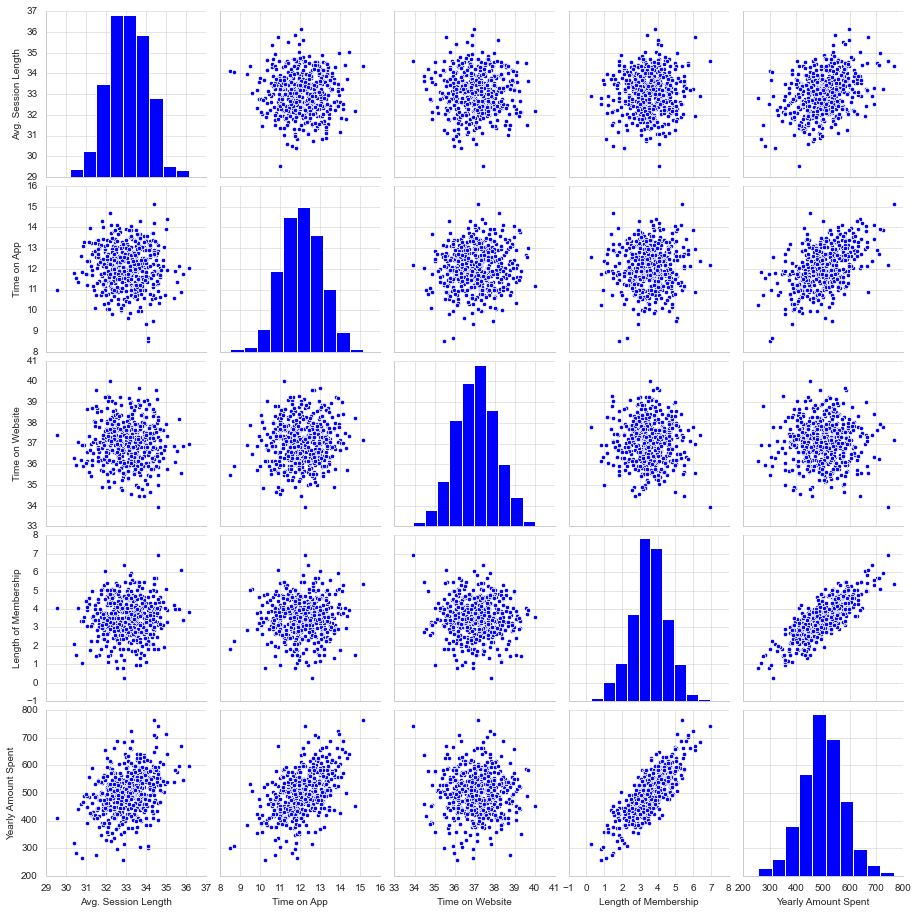

In [52]:
#Visualization of Relationship across the entire dataset
sns.pairplot(data_ecom)

Visualisasi dari korelasi dari tiap variabel.

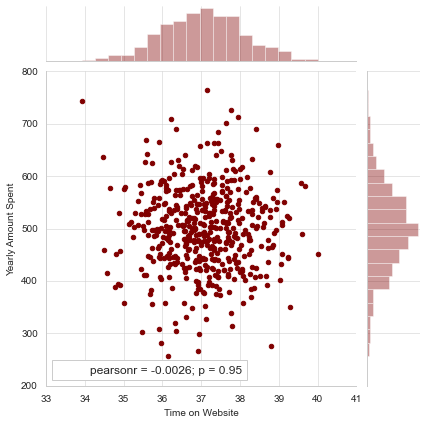

In [54]:
#Correlation between Time on Website and Yearly Amount Spent
sns.set_style('whitegrid')
sns.jointplot(x='Time on Website',y='Yearly Amount Spent',data=data_ecom,color='#800000',marker='o',stat_func=stat.pearsonr)

Dalam gambaran plot diatas, jika dilihat dari nilai pearsonr dapat diinterpretasikan bahwa korelasi antara lama waktu yang digunakan pengguna untuk melihat website Marketplace dan banyak nominal yang digunakan untuk belanja tiap tahunnya adalah termasuk **korelasi yang sangat lemah** dengan nilai pearsonr **-0.0026**. Hal ini dapat dipengaruhi oleh beberapa faktor, antara lain:
1. **Pengguna mungkin tidak terlalu tertarik dengan tampilan (User Experience dan User Interface) website dari Marketplace.**
2. **Pengguna merasa tidak efisien jika melihat dari website, dikarenakan harus melihat dengan menggunakan browser pada laptop atau personal computer.**

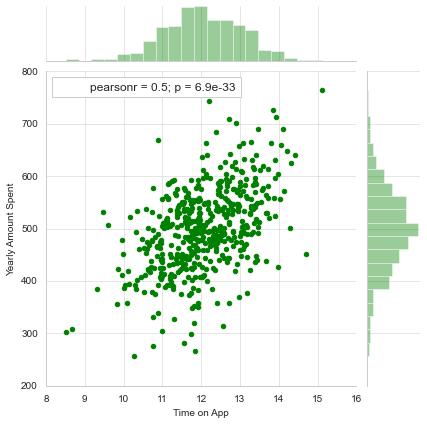

In [55]:
#Correlation between Time on App and Yearly Amount Spent
sns.set_style('whitegrid')
sns.jointplot(x='Time on App',y='Yearly Amount Spent',data=data_ecom,color='#008000',marker='o',stat_func=stat.pearsonr)

Dari visualisasi plot korelasi antara waktu pengguna melihat Marketplace melalui aplikasi dan banyak nominal yang digunakan untuk berbelanja tiap tahun, memiliki **korelasi yang kuat** yang ditunjukkan dari bilangan pearsonr sebesar **0.5**. Hal ini dapat dipengaruhi dari beberapa faktor, antara lain:
1. **Pengguna merasa lebih fleksibel karena dapat melihat Marketplace melalui smartphone mereka.** 
2. **Pengguna merasa lebih efisien, apabila sewaktu-waktu ingin membeli barang dari aplikasi Marketplace.**
2. **Tampilan dari aplikasi Marketplace yang cukup baik.**

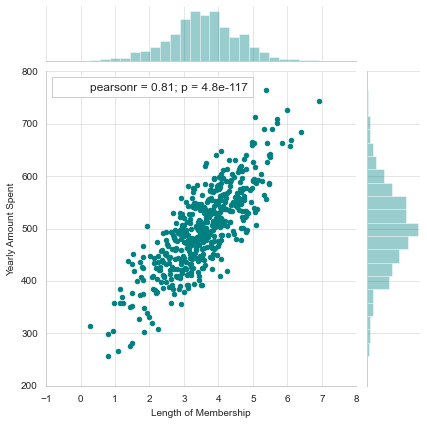

In [56]:
#Correlation between Length of Membership and Yearly Amount Spent
sns.set_style('whitegrid')
sns.jointplot(x='Length of Membership',y='Yearly Amount Spent',data=data_ecom,color='#008080',marker='o',stat_func=stat.pearsonr)

Dari visualisasi korelasi antara lama pengguna telah menjadi member dari marketplace dan jumlah nominal yang digunakan untuk berbelanja di marketplace memiliki **korelasi yang sangat kuat**, dapat dilihat dari bilangan pearsonr sebesar **0.81**. Hal ini dapat dipengaruhi oleh beberapa faktor, antara lain:
1. **Jika pengguna telah menjadi member, maka akan mendapat keuntungan seperti promosi dan diskon yang berbeda dari pengguna yang belum menjadi member.**
2. **Dari sisi lain, keuntungan lain adalah pengguna yang telah menjadi member dapat memilih avatar sesuka mereka.**

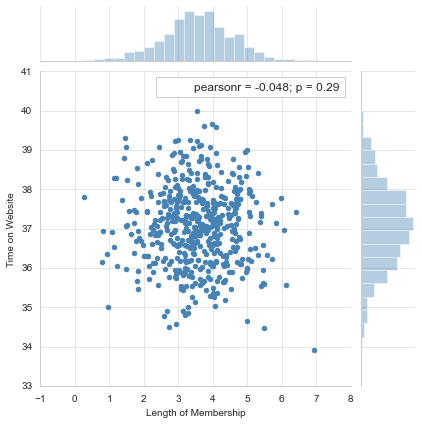

In [60]:
#Correlation between Length of Membership and Time on Website
sns.set_style('whitegrid')
sns.jointplot(x='Length of Membership',y='Time on Website',data=data_ecom,color='#4682B4',marker='o',stat_func=stat.pearsonr)

Dari visualisasi antara lama pengguna menjadi member dan waktu yang dihabiskan untuk melihat marketplace melalui website memiliki **korelasi yang sangat lemah** dengan nilai pearsonr **-0.048**. Hal ini dapat dipengrauhi oleh beberapa hal, antara lain:
1. **Meskipun pengguna telah menjadi member, mereka mungkin merasa kurang efisien apabila melihat marketplace melalui website.**
2. **Tampilan dari website tidak terlalu menarik, meskipun pengguna yang telah menjadi member, karena untuk tampilan website tidak memiliki perbedaan antara pengguna yang telah menjadi member dengan member biasa.**

<h3> Training dan Testing Data </h3>

In [10]:
data_ecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [11]:
data_ecom.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [12]:
X=data_ecom[['Avg. Session Length', 'Time on App','Time on Website', 'Length of Membership']]

In [13]:
y=data_ecom['Yearly Amount Spent']

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

Setelah eksplorasi data dilakukan selanjutnya adalah melakukan training dan test data. Pada analisa ini yang menggunakan variabel data yaitu **Yearly Amount Spent** sebagai variabel Y dan **Average Session Length, Time on App dan Time on Website** sebagai variabel X. Test dan training menggunakan library dari **Sklearn** yaitu **train_test_split** untuk nilai **test size** sebesar 0.3 dan nilai **random state** digunanakan sebesar 101. 

Pada proses training dan test dilakukan pendefinisian **X_train sebagai data X yang ingin dilatih**, **X_test sebagai data X yang ingin dites**, **y_train adalah variabel dependen yang dilatih** dan **y_test merupakan variabel dependen yang diuji.** Digunakan parameter **test size** sebesar 0.3 yaitu mewakili ukuran **test sebesar 30% dan proses train set sebesar 70%**, agar sesuai dengan aturan proporsional proses train dan test. Lalu, parameter selanjutnya adalah **random state** yang merupakan pembangkit bilangan acak (RNG), pada proses training dan test ini digunakan sebesar 101.

<h3> Pemodelan Data </h3>

In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
lm = LinearRegression()

In [18]:
lm.fit(X_train,y_train)

LinearRegression()

In [19]:
lm.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}

In [58]:
#Print Model Intercept
print(lm.intercept_)

-1047.9327822502385


In [20]:
lm.coef_

array([25.98154972, 38.59015875,  0.19040528, 61.27909654])

In [21]:
print('Coefficients:\n',lm.coef_)

Coefficients:
 [25.98154972 38.59015875  0.19040528 61.27909654]


Setelah pendefinisian variabel X dan Y pada proses training dan test, maka selanjutnya adalah melatih model yang digunakan dengan menggunakan data X_train dan y_train yang telah didefinisikan. Pada analisa ini menggunakan model **Linear Regression** dari library Sklearn. 

Jika proses pemodelan telah selesai, selanjutnya adalah mengetauhi koefisien dari model yang dipakai. Pada analisa ini didapatkan koefisien sebagai berikut:
1. Nilai **-1047.9327822502385** pada model mewakili **Intercept**
2. Nilai koefisien **25.98154972** mewakili nilai **Avg. Session Length**
3. Nilai koefisien **38.59015875** mewakili nilai **Time on App**
4. Nilai koefisien **0.19040528** mewakili nilai **Time on Website**
5. Nilai koefisien **61.27909654** mewakili nilai **Length of Membership**


<h3> Prediksi Data Test </h3>

In [23]:
predictions=lm.predict(X_test)

Text(0, 0.5, 'Predicted Values')

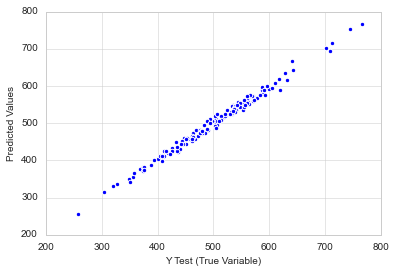

In [24]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test (True Variable)')
plt.ylabel('Predicted Values')

Setelah proses pemodelan selesai dilakukan, selanjutnya adalah memprediksi nilai test (X_test). Proses prediksi dilakukan untuk melihat performa dari model , disini karena digunakan Linear Regression sebagai model, maka peforma akan ditampilkan dengan grafik. Jika grafik yang dihasilkan mendekati grafik **Linear Regression** maka performa dari model yang digunakan baik atau fit. 

<h3> Evaluasi Model </h3>

In [25]:
from sklearn import metrics

In [26]:
print("MAE: ",metrics.mean_absolute_error(y_test,predictions))
print("MSE: ",metrics.mean_squared_error(y_test,predictions))
print("RMSE: ",np.sqrt(metrics.mean_squared_error(y_test,predictions)))

MAE:  7.228148653430817
MSE:  79.81305165097437
RMSE:  8.93381506697863


In [27]:
metrics.explained_variance_score(y_test,predictions)

0.9890771231889607

Pada evaluasi model digunakan evaluasi **MAE: Mean Absolute Error, MSE: Mean Squared Error dan RMSE: Root Mean Square Error** dan didapatkan nilai evaluasi sebagai berikut:
- **MAE:  7.228148653430817**
- **MSE:  79.81305165097437**
- **RMSE:  8.93381506697863**



<h3> Visualisasi Data Hasil Prediksi </h3>

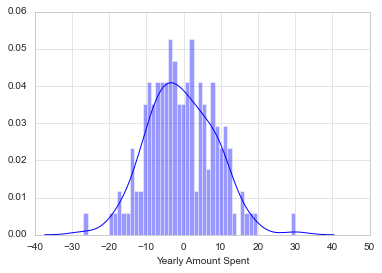

In [28]:
sns.distplot(y_test-predictions,bins=50)

Pada visualisasi data hasil prediksi di atas, dapat diinterpretasikan bahwa hasil prediksi dengan nilai y_test (nilai data sebenarnya) terdistribusi dengan cukup baik.  

<h3> Kesimpulan </h3>

In [31]:
data_new=pd.DataFrame(lm.coef_,X.columns,columns=['Coeff'])
data_new

,Coeff
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


Sebelum menarik kesimpulan hal yang harus dilakukan adalah menginterpretasikan nilai dari masing-masing coefficient yang telah didapatkan.

**Interpretasi Coefficient:**
- Jika perusahaan ingin memperbaiki semua fitur untuk menaikkan jumlah **Average Session Length** dibutuhkan dana sebesar **$25.88** per satu unit.
- Jika perusahaan ingin memperbaiki fitur aplikasi pada smartphone untuk menaikkan jumlah **Time on App** maka dibutuhkan dana sebanyak **$38.59** per satu unit.
- Jika perusahaan ingin memperbaiki fitur pada website untuk menaikkan jumlah **Time on Website** dibutuhkan dana sebesar **$0.19** per satu unit.
- Jika perusahaan ingin memperbaiki fitur pada membership untuk menaikkan jumlah **Length of Membership** dibutuhkan dana sebesar **$61.27** per satu unit.

Lalu, kesimpulan yang didapat dari interpretasi nilai coefficient ialah akan lebih baik jika perusahaan memfokuskan untuk memperbaiki fitur pada website, dikarenakan beberapa faktor antara lain:

1. Jika dilihat dari korelasi antara lama pengguna menghabiskan waktu melihat website marketplace dengan jumlah nominal yang digunakan untuk berbelanja di marketplace selama setahun kedua variabel ini memiliki korelasi yang sangat rendah. Mungkin jika fitur dari website diperbaiki, akan memperbaiki korelasi dari kedua variabel ini. 
2. Hal ini juga berlaku pada korelasi pengguna yang telah menjadi member dengan waktu yang digunakan untuk melihat website. Memiliki  korelasi yang sangat rendah, akan lebih baik lagi jika perusahaan lebih fokus memperbaiki fitur pada website.
3. Dari sisi finansial perusahaan, memperbaiki fitur pada website memiliki harga yang rendah dibanding harus meningkatkan fitur pada aplikasi smartphone. 